# Basic Usage

In [1]:
import numpy as np
import xarray as xr

from xfit import fit_dataArray, fit_dataset, plot_fits

## Generating dummy data

In [15]:
ms = xr.DataArray(np.arange(4), coords = {'m_true': np.arange(4)}, dims='m_true')
bs = xr.DataArray(np.linspace(0,10,6), coords={'b_true': np.linspace(0,10,6)}, dims='b_true')
xs = xr.DataArray(np.linspace(0,20,101), coords={'x': np.linspace(0,20,101)}, dims='x')

data = xs*ms + bs
data.values += 5*(np.random.rand(101, 4, 6)-0.5)

In [16]:
data.data.shape

(101, 4, 6)

The data we have made are lines where the coordinates index the true slope and intercept:

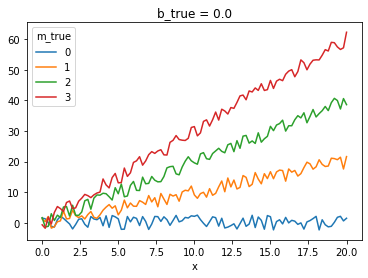

In [17]:
_ = data.sel(b_true=0).plot.line(x='x')

## Fitting DataArrays

In [18]:
# The function we want to fit over
def lin_func(x, m, b):
    return m*x + b

# These need to be in the same order they are introduced in the fit function, so 'm' was 
# first and it's first in this list
lin_params = [ 
    'm',
    'b'
]

# the function to generate guesses
def lin_func_guess(x, y, **kwargs): # you should always include the "**kwargs" piece, read the documentation for why
    m_guess = (y[-1] - y[0])/(x[-1] - x[0])
    b_guess = y[0] - m_guess*x[0]
    
    return m_guess, b_guess # must be returned in the order they are taken in the fit function

In [19]:
fit = fit_dataArray(
    data,
    lin_func,
    lin_func_guess,
    lin_params,
    'x'
)

The result is a dataset with all of the relevant information

In [20]:
fit

<xarray.Dataset>
Dimensions:    (b_true: 6, m_true: 4, param: 2, param_cov: 2, x: 101)
Coordinates:
  * m_true     (m_true) int32 0 1 2 3
  * b_true     (b_true) float64 0.0 2.0 4.0 6.0 8.0 10.0
  * param      (param) <U1 'm' 'b'
  * param_cov  (param_cov) <U1 'm' 'b'
  * x          (x) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 19.2 19.4 19.6 19.8 20.0
Data variables:
    popt       (param, m_true, b_true) float64 -0.01628 -0.004713 ... 10.69
    perr       (param, m_true, b_true) float64 0.02428 0.02405 ... 0.2892 0.2778
    pcov       (param_cov, param, m_true, b_true) float64 0.0005897 ... 0.07717
    xda        (x) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 19.2 19.4 19.6 19.8 20.0
    yda        (x, m_true, b_true) float64 1.53 -0.05194 3.313 ... 68.61 72.15
    yerr_da    (x, m_true, b_true) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    fit_func:     <function lin_func at 0x00000259C9E5FA60>
    param_names:  ['m', 'b']
    xname:        x
    yname:        None

We can plot the fit functions over the original data to do a quick diagnostic:

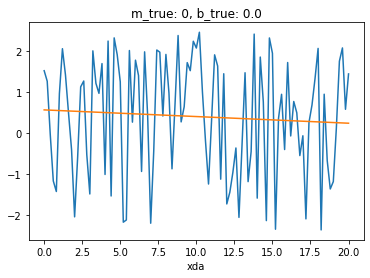

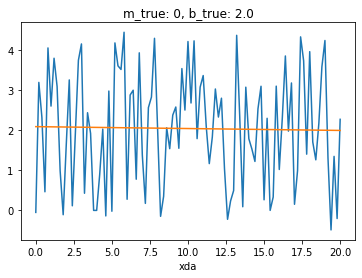

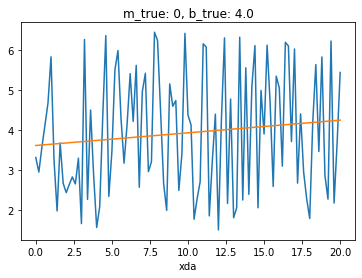

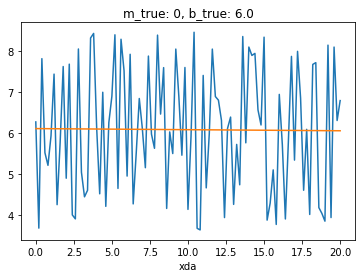

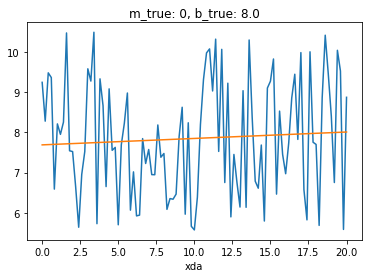

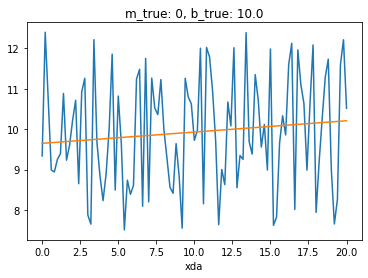

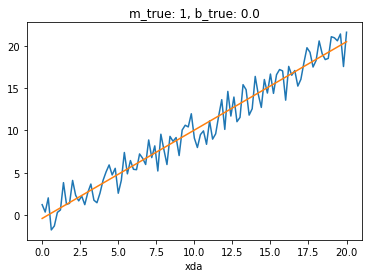

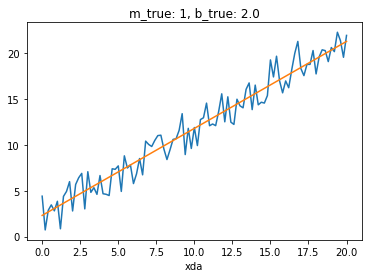

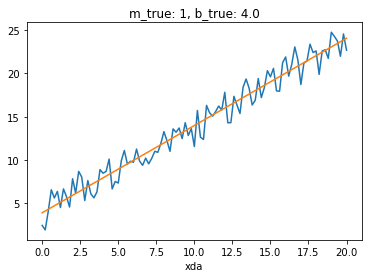

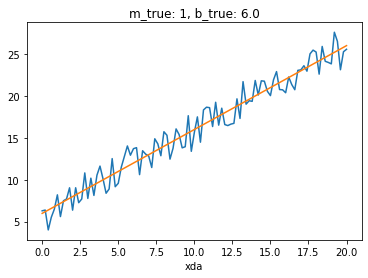

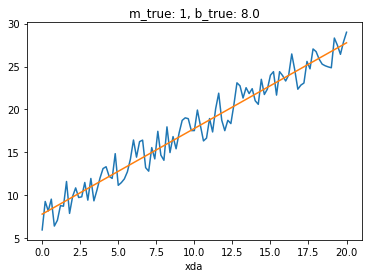

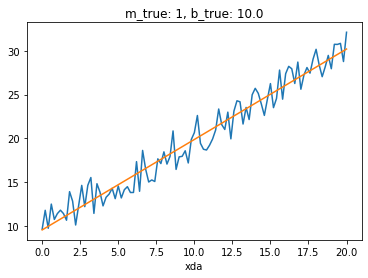

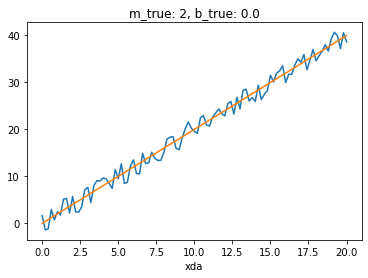

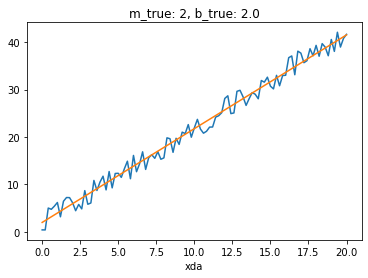

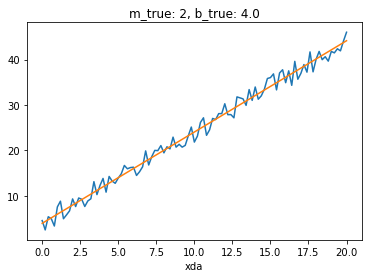

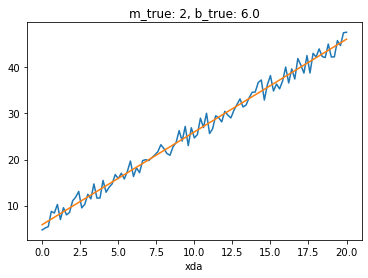

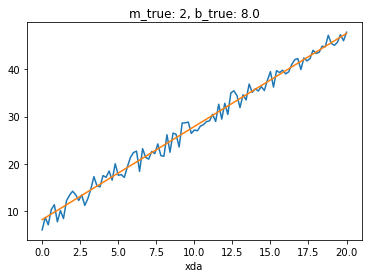

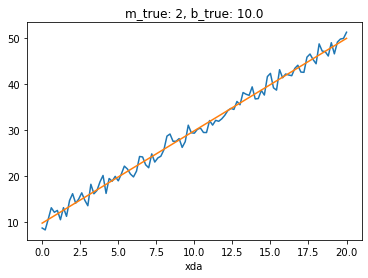

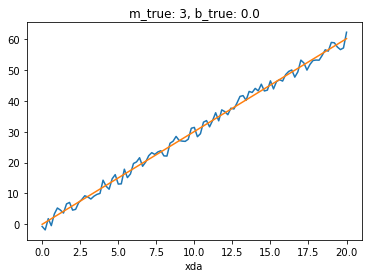

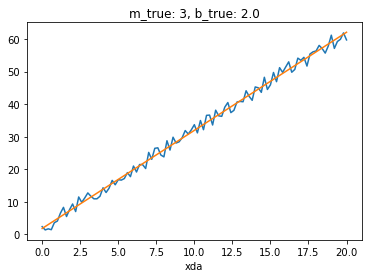

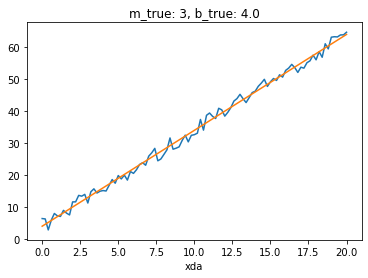

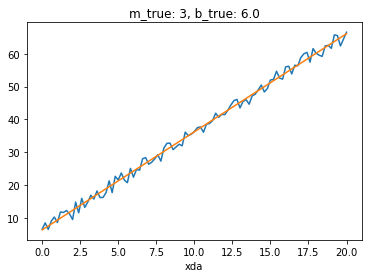

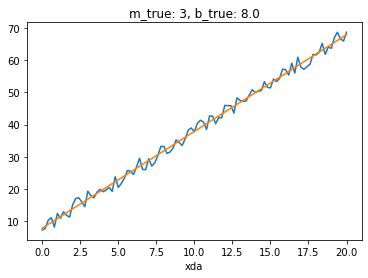

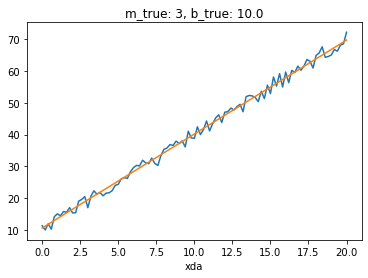

In [21]:
plot_fits(fit)

Since our dataset had coordinates which corresponded to the true slope and intercept, we can plot these vs the fit values

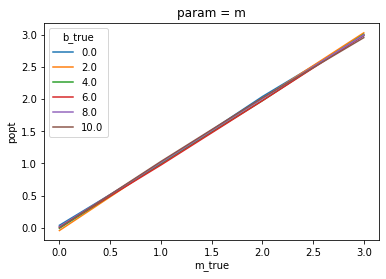

In [8]:
_ = fit['popt'].sel(param='m').plot.line(x='m_true')

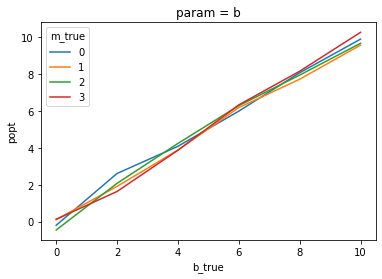

In [9]:
_ = fit['popt'].sel(param='b').plot.line(x='b_true')

## Fitting Datasets

In [10]:
data_ds = xr.Dataset(data_vars={'mydata': data})

Fitting is basically the same, except we now also need to specify the data variable containing the data we would like to fit over

In [11]:
fit2 = fit_dataset(
    data_ds,
    lin_func,
    lin_func_guess,
    lin_params,
    'x',
    'mydata'
)

`fit2` is the same as `fit`

In [12]:
(fit == fit2).all()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    popt     bool True
    perr     bool True
    pcov     bool True
    xda      bool True
    yda      bool True
    yerr_da  bool False

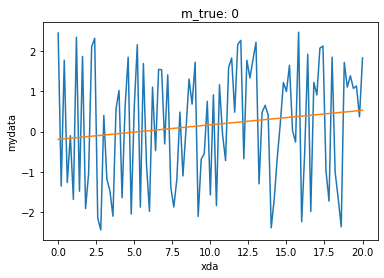

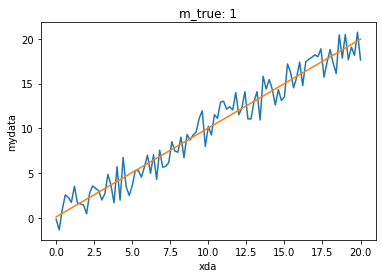

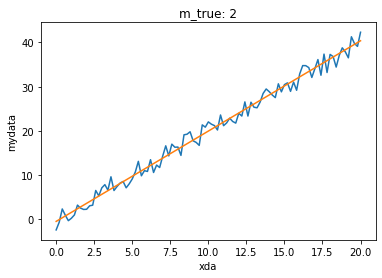

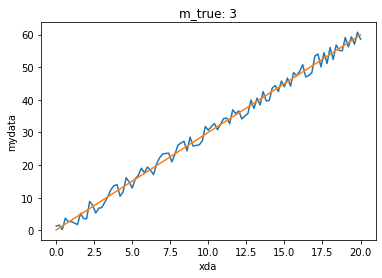

In [13]:
plot_fits(fit2, b_true=0)